In [108]:
import pandas as pd
import seaborn as sns

In [109]:
#bring in combined pickle file all years 2015-2017
df_payments_combined = pd.read_pickle('../data/df_payments_combined.pkl')

- Chart showing payments (average_medicare_allowed_amount) over time
  -Two charts, based on Entity (I, O) for Individual and for Organization
- Chart showing counts over time (count of Beneficiaries and count of Services)

- Entity I, POS F = Doctor Only
- Entity O, POS F = Facility Only
- Entity I, POS O = Doctor & Facility

In [114]:
def add_type(df_payment_combined):
    if df_payment_combined['entity_type'] == 'I' & 'place_of_service' == 'F' :
        type = 'Doctor Only'
    elif df_payment_combined['entity_type'] == 'O'& 'place_of_service' == 'F':
        type = 'Facility Only'
    else:
        type = 'Doctor & Facility'
    return type

df_payments_combined['type'] = df_payments_combined.apply(add_type, axis=1)



#df_payments_combined['type'] = if 'entity_type' = 'I' & 'place_of_service' = 'F'
 #                           then 'Doctor Only',
  #                          if 'entity_type' = 'O' & 'place_of_service' = 'F'
   #                         then 'Facility Only',
    #                        if 'entity_type' = 'I' & 'place_of_service' = 'O'
     #                       then 'Doctor & Facility'

KeyError: 'entity_type'

In [ ]:
#groupby NPI/HCPCS/POS/Entity 

In [107]:
df_payments_combined['number_of_services'].value_counts()

12.0        872921
13.0        845956
11.0        813841
14.0        796302
15.0        745168
             ...  
462.7            1
463.7            1
463.2            1
838753.0         1
42864.0          1
Name: number_of_services, Length: 59741, dtype: int64

In [94]:
df_payments_combined['number_of_medicare_beneficiaries'].value_counts()

11.0       1398497
12.0       1242831
13.0       1114063
14.0       1007118
15.0        916450
            ...   
14753.0          1
14737.0          1
14732.0          1
14728.0          1
8848.0           1
Name: number_of_medicare_beneficiaries, Length: 16421, dtype: int64

In [95]:
df_payments_combined['entity_type_of_the_provider'].value_counts()

I    27781515
O     1278714
Name: entity_type_of_the_provider, dtype: int64

In [97]:
#group by hcpcs code, graph avg medicare payment over the years for that hcpcs(top 10? or graph in tableau) 
#(x-axis=year,y-axis=avg payment,lines=hcpcs code )

In [98]:
df_groupby = df_payments_combined.groupby(['hcpcs_code','average_medicare_allowed_amount']).average_medicare_allowed_amount.agg('count').to_frame('count')

In [99]:
df_groupby #need to add year here

count
hcpcs_code average_medicare_allowed_amount       
0008M      3419.419329                          1
           3419.420000                          2
           3443.360000                          5
00100      133.772500                           1
           133.947500                           1
...                                           ...
V2785      4714.285714                          1
           4910.714286                          1
           4920.694444                          1
           4923.076923                          1
           7145.000000                          1

[13730934 rows x 1 columns]

Combined DataFrame - merged, with separate row for each NPI, with separate columns for each year’s payments, etc.

In [101]:
df_payments_merge1 = pd.merge(df_payments_2015, df_payments_2016, on = 'national_provider_identifier', how = 'outer')
df_payments_combmerge = pd.merge(df_payments_merge1, df_payments_2017, on = 'national_provider_identifier', how='outer')


NameError: name 'df_payments_2015' is not defined

KeyboardInterrupt: 

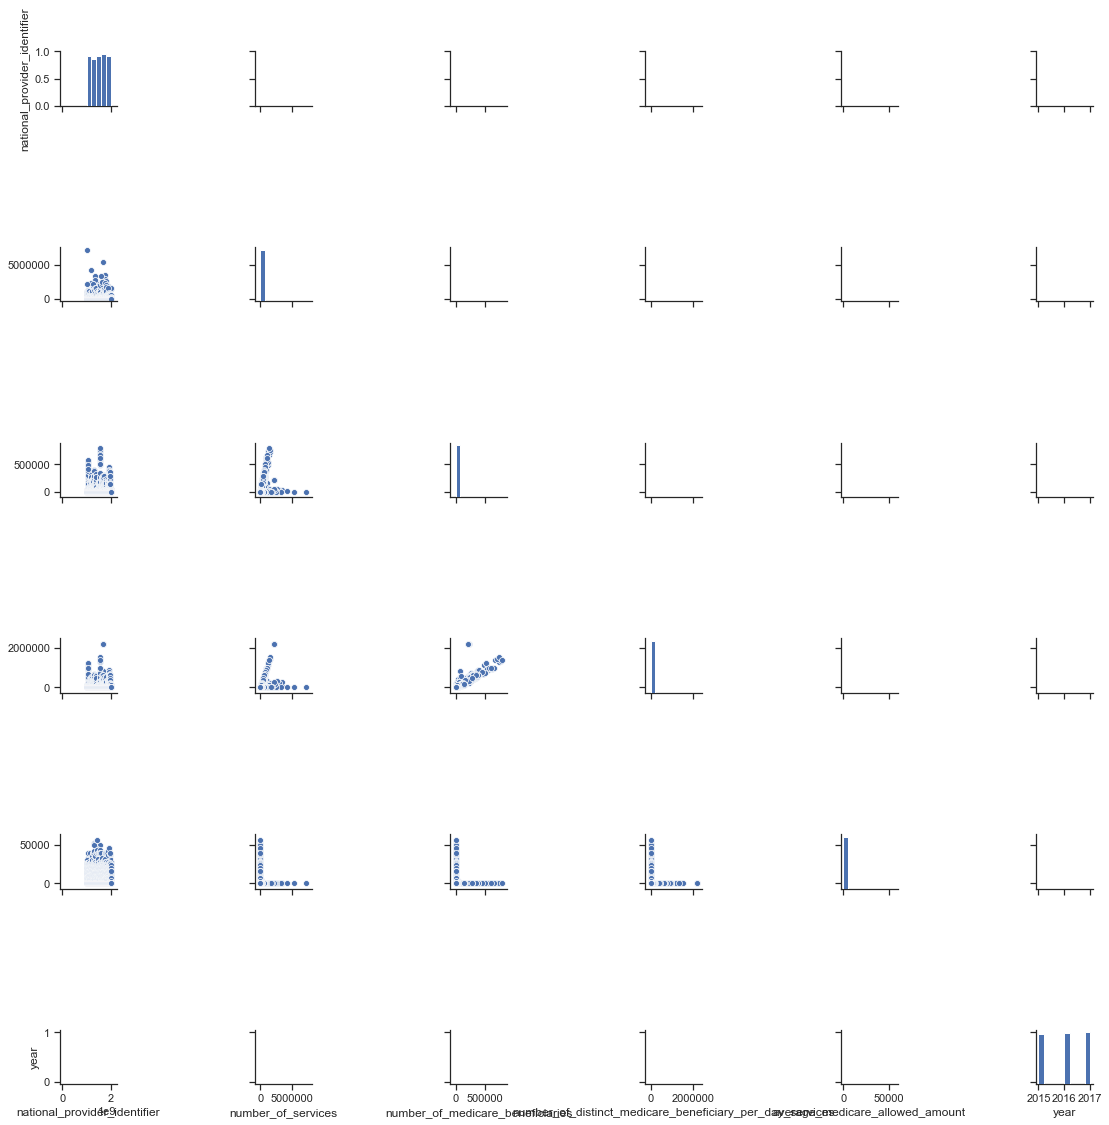

In [46]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)